Matrix Completion

We intend to complete the Matrix with unkown entries using Matrix decomposotion where we learn decomposed matrices using Gradient Decent and Nested Linear Regression

Matrix Factorization

For a matrix $A_{n,m}$ learn $W_{n,r}$ and $H_{r,m}$ such that,

$ A = WH$

Method 1 : Gradient Decent

In [249]:
import numpy as  np
import matplotlib.pyplot as plt

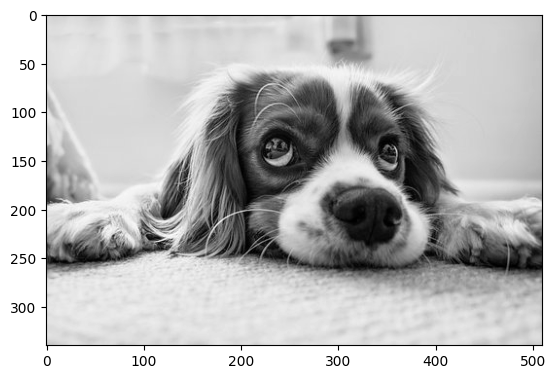

In [250]:
# Creating A
from matplotlib.image import imread

X = imread("Datasets/puppy.jpg")
A = np.mean(X,-1)
img = plt.imshow(A)
plt.set_cmap('gray')
plt.show()

In [251]:
def loss_gradient_wrt_W(W,H,i,j):
    return -2*(A[i] - W[i]@H)@H[j]

def loss_gradient_wrt_H(W,H,i,j):
    return -2*(A[:,i] - W@H[:,j])@W[:,i]

In [301]:
# Training

# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

max_iterations = 2
alpha = 0.00001

for i in range(max_iterations):
    for j1 in range(W.shape[0]):
        for j2 in range(W.shape[1]):
            W[j1][j2] = W[j1][j2] - alpha*loss_gradient_wrt_W(W, H, j1, j2)
    for j1 in range(H.shape[0]):
        for j2 in range(H.shape[1]):
            H[j1][j2] = H[j1][j2] - alpha*loss_gradient_wrt_H(W, H, j1, j2)

In [302]:
constructed_A = W@H

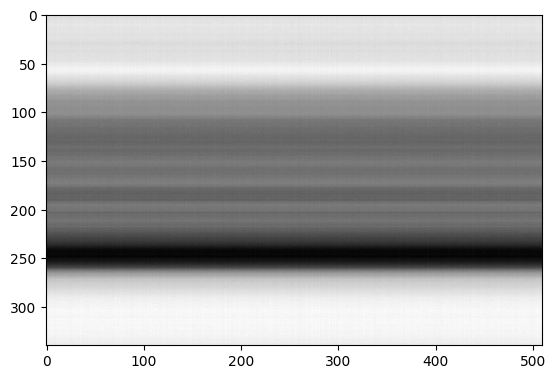

In [303]:
img = plt.imshow(constructed_A)
plt.set_cmap('gray')
plt.show()

Method 2 : Alternating Least Squares

Let's first use the A matrix as it is :

In [279]:
# intializing W and H
r = 10
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

# training

max_iterations = 50

for _ in range(max_iterations):
    # learning H
    for i in range(H.shape[1]):
        H[:,i] = np.linalg.inv((W.T@W))@W.T@A[:,i]
    # learning W
    for j in range(W.shape[0]):
        W[j] = np.linalg.inv(H@H.T)@H@A[j]
constructed_A = W@H

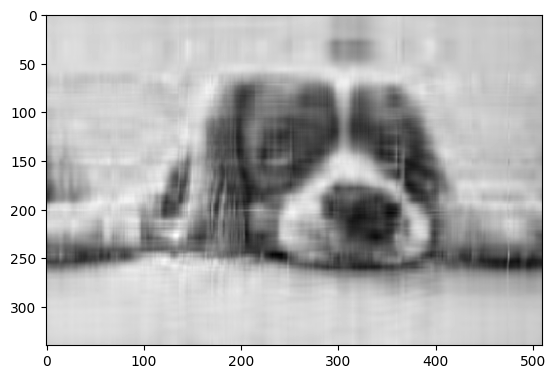

In [280]:
img = plt.imshow(constructed_A)
plt.set_cmap('gray')
plt.show()

Dropping some values in A :

In [293]:
mask = np.random.rand(A.shape[0], A.shape[1])
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if mask[i][j] < 0.3:
            mask[i][j] = 1
        else :
            mask[i][j] = 0
M = np.ma.masked_array(A,mask)

In [294]:
A_incomplete = M.filled(np.nan)

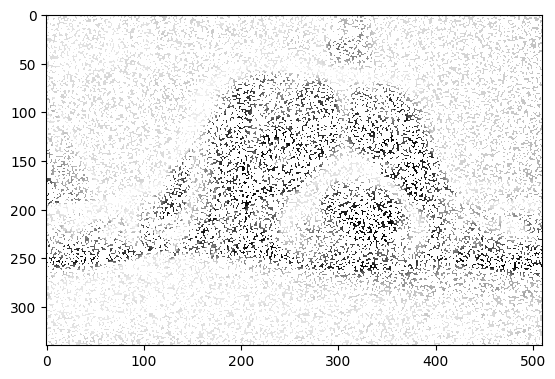

In [295]:
img = plt.imshow(A_incomplete)
plt.set_cmap('gray')
plt.show()

In [296]:
# Reconstructing

# intializing W and H
r = 10
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

# training

max_iterations = 100

for _ in range(max_iterations):
    # learning H
    for i in range(H.shape[1]):
        keep = ~np.isnan(A_incomplete[:,i])
        M = np.linalg.inv((W.T@W))@W.T
        for i1 in range(H.shape[0]):
            H[:,i][i1] = M[i1][keep]@A_incomplete[:,i][keep]
    # learning W
    for j in range(W.shape[0]):
        keep = ~np.isnan(A_incomplete[j])
        M = (np.linalg.inv(H@H.T)@H)
        for j1 in range(W.shape[1]):
            W[j][j1] = M[j1][keep]@A_incomplete[j][keep]
constructed_A = W@H


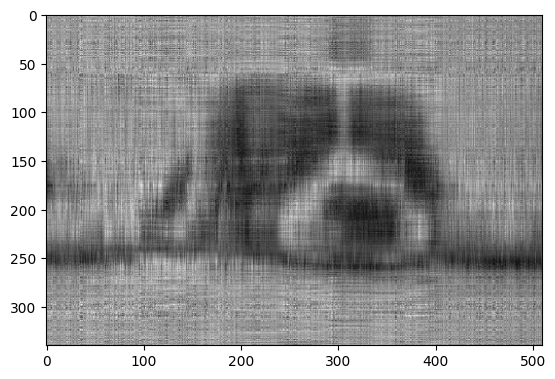

In [297]:
img = plt.imshow(constructed_A)
plt.set_cmap('gray')
plt.show()